In [1]:
# from sklearn import svm,metrics
from sklearn.neighbors import KNeighborsClassifier      # 분류
from sklearn.neighbors import KNeighborsRegressor       # 회귀 예측
from sklearn.linear_model import LinearRegression       # 선형 회귀
from sklearn.preprocessing import PolynomialFeatures    # 다항특성을 만들어주는 라이브러리
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import requests
import random
import glob,os.path,re
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['font.size'] = 10
matplotlib.rcParams['axes.unicode_minus']=False

In [2]:
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0])

perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0])

In [3]:
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight,random_state=42)
train_input = np.array(train_input).reshape(-1,1)
test_input = np.array(test_input).reshape(-1,1)
train_input

array([[19.6],
       [22. ],
       [18.7],
       [17.4],
       [36. ],
       [25. ],
       [40. ],
       [39. ],
       [43. ],
       [22. ],
       [20. ],
       [22. ],
       [24. ],
       [27.5],
       [43. ],
       [40. ],
       [24. ],
       [21. ],
       [27.5],
       [40. ],
       [32.8],
       [26.5],
       [36.5],
       [13.7],
       [22.7],
       [15. ],
       [37. ],
       [35. ],
       [28.7],
       [23.5],
       [39. ],
       [21. ],
       [23. ],
       [22. ],
       [44. ],
       [22.5],
       [19. ],
       [37. ],
       [22. ],
       [25.6],
       [42. ],
       [34.5]])

In [4]:
knr = KNeighborsRegressor(n_neighbors=3)
knr.fit(train_input,train_target)


KNeighborsRegressor(n_neighbors=3)

In [5]:
df = pd.DataFrame([perch_length, perch_weight])
df = df.T
df

,0,1
0,8.4,5.9
1,13.7,32.0
2,15.0,40.0
3,16.2,51.5
4,17.4,70.0
5,18.0,100.0
6,18.7,78.0
7,19.0,80.0
8,19.6,85.0
9,20.0,85.0


In [6]:
knr.predict([[50]]) # 1033.333333
knr.predict([[70]]) # 1033.333333
knr.predict([[100]]) # 1033.333333

array([1033.33333333])

In [7]:
distances,indexes = knr.kneighbors([[50]])
train_input[indexes]
train_target[indexes]
distances
indexes

array([[34,  8, 14]], dtype=int64)

훈련 세트가 없는 값은 예측이 제대로 되지 않음

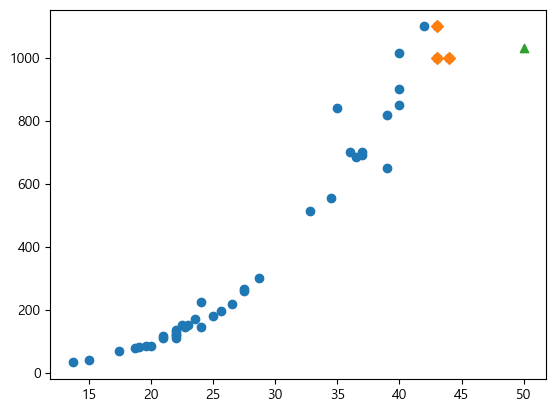

In [8]:
plt.scatter(train_input, train_target)
plt.scatter(train_input[indexes],train_target[indexes],marker='D')
plt.scatter(50,1033,marker='^')

In [9]:
distances,indexes = knr.kneighbors([[30]])
indexes

array([[28, 13, 18]], dtype=int64)

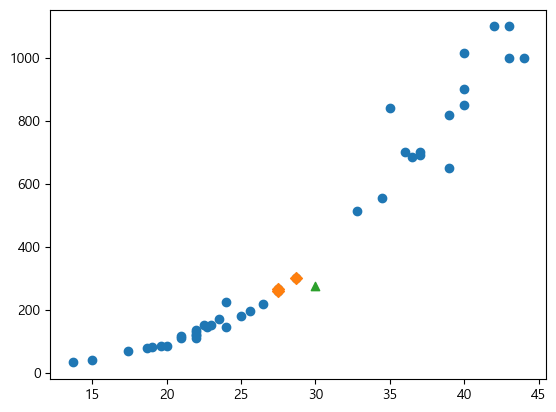

In [10]:
plt.scatter(train_input, train_target)
plt.scatter(train_input[indexes],train_target[indexes],marker='D')
plt.scatter(30,275,marker='^')

### 선형회귀

In [11]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_input,train_target)


LinearRegression()

In [12]:
lr.predict([[50]])
lr.predict([[70]])


array([1241.83860323])

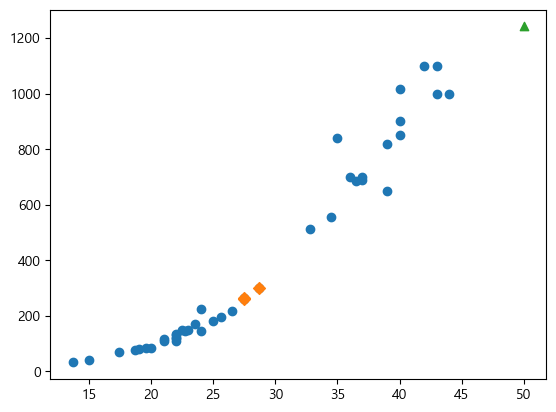

In [13]:
plt.scatter(train_input, train_target)
plt.scatter(train_input[indexes],train_target[indexes],marker='D')
plt.scatter(50,1241.83,marker='^')

### 기울기 = lr.coef_
### y절편  = lr.intercept_

In [16]:
lr.predict([[50]])
lr.predict([[70]])


array([2022.1815025])

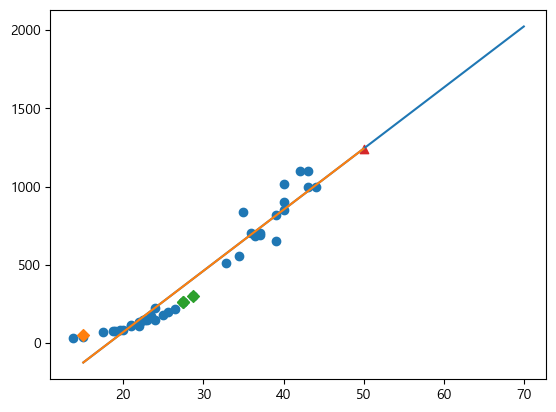

In [21]:
lr.predict([[50]])
plt.scatter(train_input, train_target)
plt.plot([15,70],[15*lr.coef_+lr.intercept_,70*lr.coef_+lr.intercept_])
plt.plot([15,50],[15*lr.coef_+lr.intercept_,50*lr.coef_+lr.intercept_])
plt.scatter(15,50,marker='D')
plt.scatter(train_input[indexes],train_target[indexes],marker='D')
plt.scatter(50,1241.83,marker='^')


In [58]:
# lr.coef_
lr.intercept_

# _ > 모델을 훈련시켜서 모델에서 제공하는 변수는 _ 사용

-709.0186449535474